**Objective of the Project:- Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors. For content creators and anyone using Instagram professionally, predicting the reach can be valuable for planning and optimizing their social media strategy. By understanding how their content is performing, creators can make informed decisions about when to publish, what types of content to create, and how to engage their audience. It can lead to increased engagement, better performance metrics, and ultimately, greater success on the platform.**

**Steps Involved**

1. Importing Libraries
2. Loading Data
3. Reading data
4. Data Cleaning
5. Visualization & Analysis
6. Conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

**Loading Data**

In [2]:
df=pd.read_csv('Instagram-Reach.csv')
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


**Reading Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Date  Instagram reach
0    False            False
1    False            False
2    False            False
3    False            False
4    False            False
..     ...              ...
360  False            False
361  False            False
362  False            False
363  False            False
364  False            False

[365 rows x 2 columns]>

In [5]:
df.shape

(365, 2)

In [6]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [7]:
df.tail()

,Date,Instagram reach
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490
364,2023-03-31T00:00:00,22014


<Axes: >

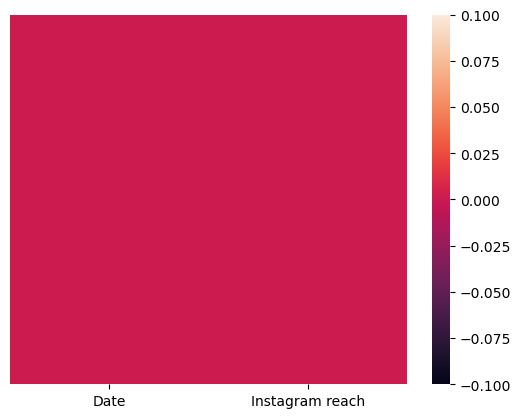

In [8]:
sns.heatmap(df.isnull(), yticklabels=False)

In [9]:
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


**Data Cleaning**

In [10]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [11]:
df

,Date,Instagram reach,Time
0,2022-04-01,7620,00:00:00
1,2022-04-02,12859,00:00:00
2,2022-04-03,16008,00:00:00
3,2022-04-04,24349,00:00:00
4,2022-04-05,20532,00:00:00
...,...,...,...
360,2023-03-27,15622,00:00:00
361,2023-03-28,18645,00:00:00
362,2023-03-29,41238,00:00:00
363,2023-03-30,50490,00:00:00


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df

,Date,Instagram reach,Time
0,2022-04-01,7620,00:00:00
1,2022-04-02,12859,00:00:00
2,2022-04-03,16008,00:00:00
3,2022-04-04,24349,00:00:00
4,2022-04-05,20532,00:00:00
...,...,...,...
360,2023-03-27,15622,00:00:00
361,2023-03-28,18645,00:00:00
362,2023-03-29,41238,00:00:00
363,2023-03-30,50490,00:00:00


In [14]:
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [15]:
df.head()

,Date,Instagram reach,Time
0,2022-04-01,7620,00:00:00
1,2022-04-02,12859,00:00:00
2,2022-04-03,16008,00:00:00
3,2022-04-04,24349,00:00:00
4,2022-04-05,20532,00:00:00


In [16]:
df.tail()

,Date,Instagram reach,Time
360,2023-03-27,15622,00:00:00
361,2023-03-28,18645,00:00:00
362,2023-03-29,41238,00:00:00
363,2023-03-30,50490,00:00:00
364,2023-03-31,22014,00:00:00


**Visualization & Analysis**

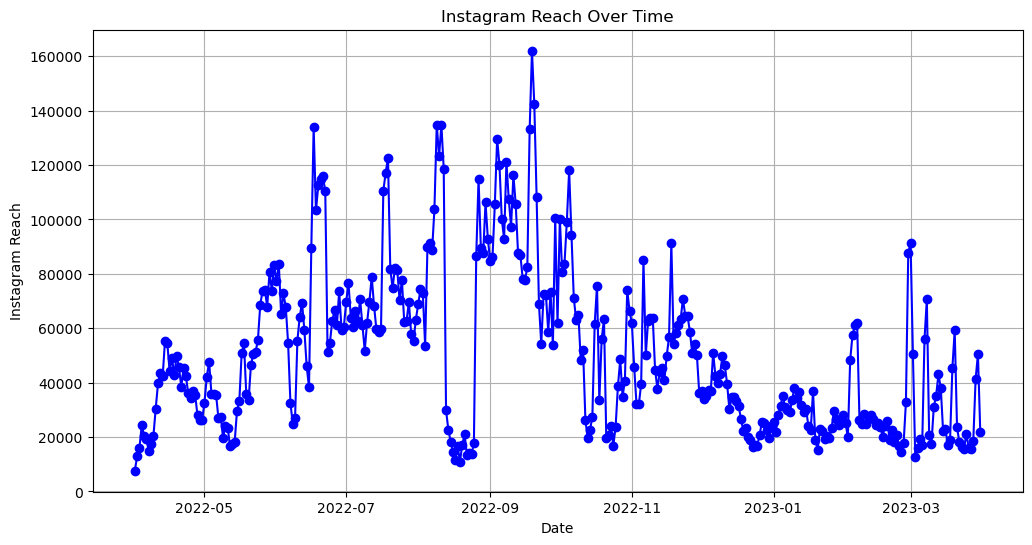

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Instagram reach'], marker='o', linestyle='-', color='b')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.show()

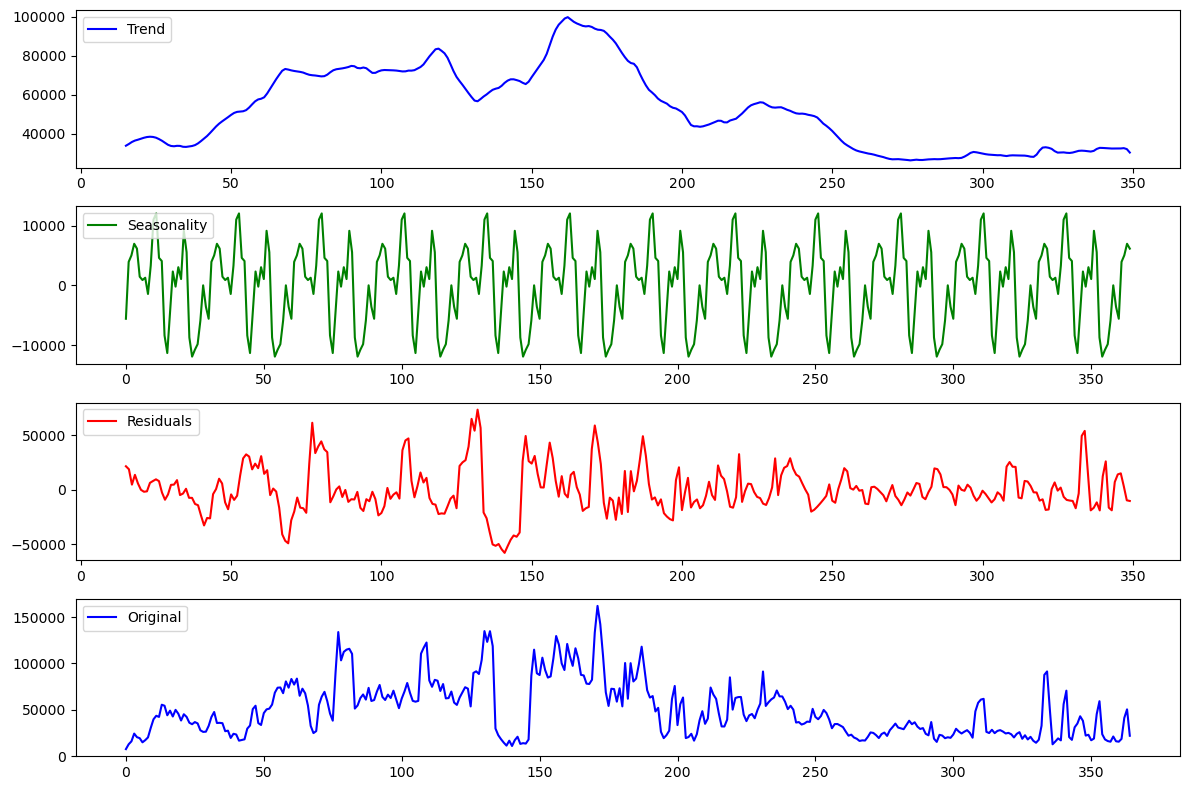

In [19]:
decomposition = seasonal_decompose(df['Instagram reach'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend', color='b')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality', color='g')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals', color='r')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df['Instagram reach'], label='Original', color='b')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

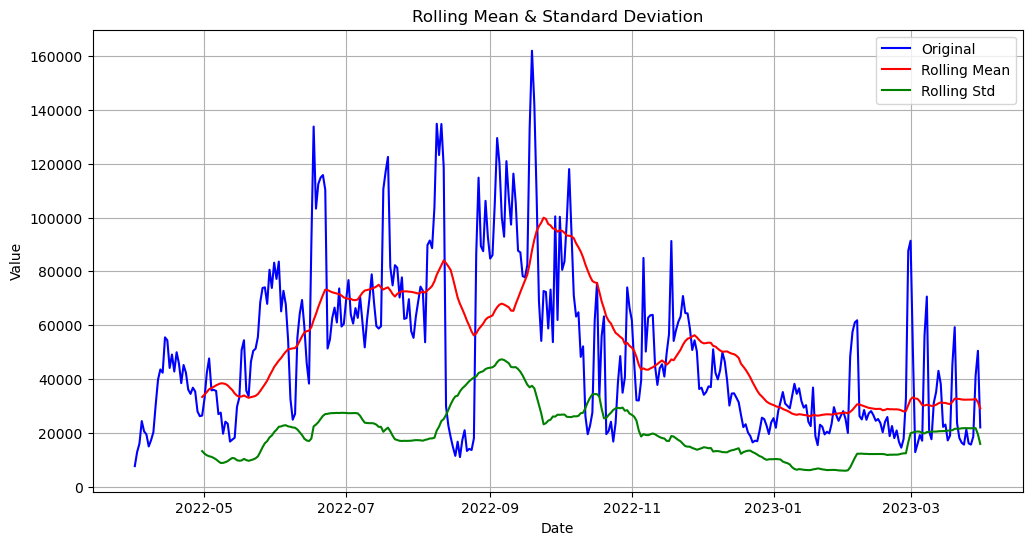

In [20]:
rolling_mean = df['Instagram reach'].rolling(window=30).mean()
rolling_std = df['Instagram reach'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Instagram reach'], label='Original', color='b')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean', color='r')
plt.plot(df['Date'], rolling_std, label='Rolling Std', color='g')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

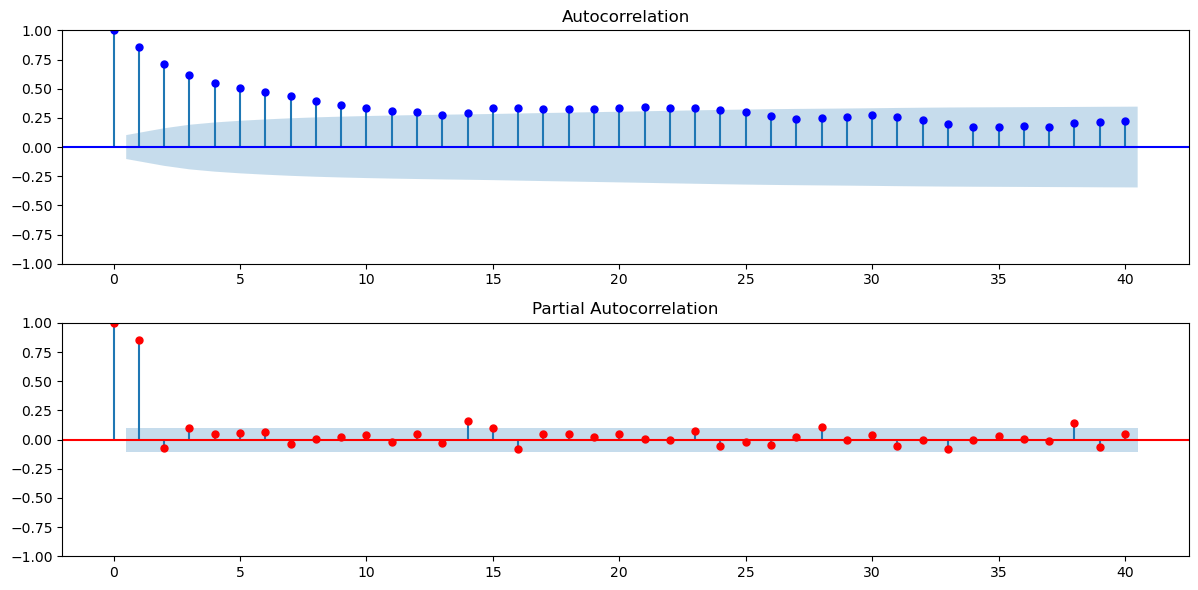

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['Instagram reach'], lags=40, ax=plt.gca(), color='b')
plt.subplot(212)
plot_pacf(df['Instagram reach'], lags=40, ax=plt.gca(), color='r')
plt.tight_layout()
plt.show()

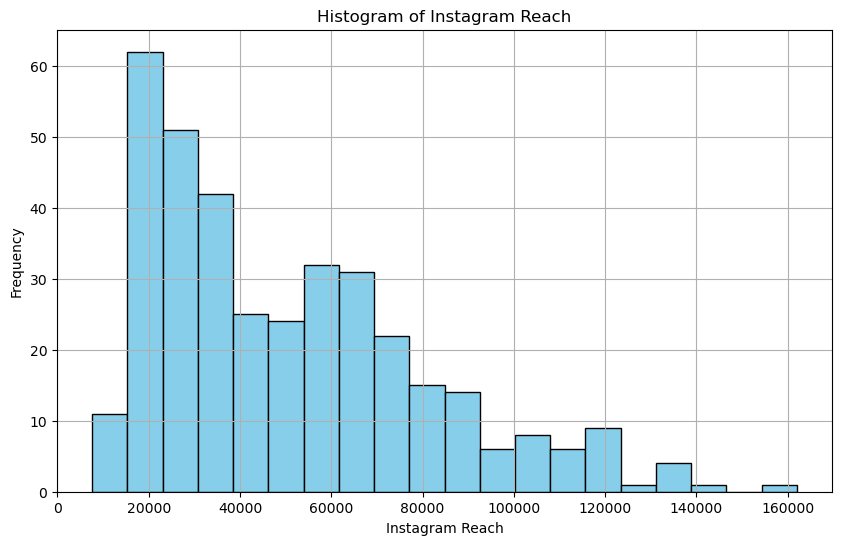

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Instagram reach'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Instagram Reach')
plt.xlabel('Instagram Reach')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


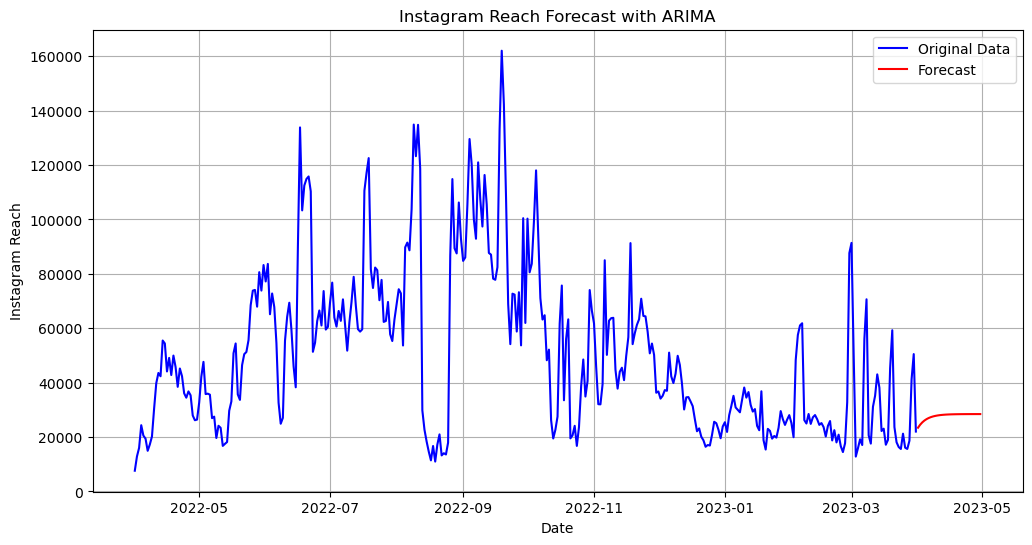

Forecasted Instagram Reach:
2023-04-01    23434.362333
2023-04-02    24541.004430
2023-04-03    25403.218742
2023-04-04    26074.992860
2023-04-05    26598.389955
2023-04-06    27006.182562
2023-04-07    27323.904636
2023-04-08    27571.450360
2023-04-09    27764.319822
2023-04-10    27914.589553
2023-04-11    28031.668700
2023-04-12    28122.888179
2023-04-13    28193.959704
2023-04-14    28249.333420
2023-04-15    28292.476556
2023-04-16    28326.090522
2023-04-17    28352.280057
2023-04-18    28372.685021
2023-04-19    28388.583071
2023-04-20    28400.969666
2023-04-21    28410.620391
2023-04-22    28418.139528
2023-04-23    28423.997887
2023-04-24    28428.562291
2023-04-25    28432.118540
2023-04-26    28434.889308
2023-04-27    28437.048087
2023-04-28    28438.730049
2023-04-29    28440.040511
2023-04-30    28441.061526
Freq: D, Name: predicted_mean, dtype: float64


In [28]:

p = 1  
d = 1  
q = 1

model = ARIMA(df['Instagram reach'], order=(p, d, q))
results = model.fit()

forecast_steps = 30  
forecast = results.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Instagram reach'], label='Original Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Instagram Reach Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Instagram Reach:")
print(forecast)

**Conclusion**

**In this project, we utilized the ARIMA (AutoRegressive Integrated Moving Average) model to analyze 366 data points representing Instagram reach. We uncovered insights into reach trends and seasonality, allowing content creators and social media professionals to schedule posts strategically. By considering autocorrelation patterns, we offered a data-driven approach to enhance content strategies. The ARIMA model serves as a valuable tool for forecasting Instagram reach, enabling informed decisions and boosting success in the dynamic realm of Instagram marketing.**